## Libraries

In [1]:
pip install --user --upgrade tensorflow-gpu

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu (from versions: none)
ERROR: No matching distribution found for tensorflow-gpu
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install chars2vec

Note: you may need to restart the kernel to use updated packages.


In [1]:
#conda create -n envname python=3.6
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
#import chars2vec
#from keras.models import load_model
#new_model = load_model('trained_model')

#c2v_model = Char2VecModel.load_model('trained_model')
pip install tensorflow

SyntaxError: invalid syntax (2371756903.py, line 6)

## Output of code clone detection dat

In [1]:


import pandas as pd

df = pd.read_csv('/Users/vivekgoud/Downloads/thesis/method_leveltracking.csv')
df=df.drop_duplicates(subset=['codeBlockId','Revision','codeCloneBlockId'],keep='last')
df["unique"] =  "R1"+df["Revision"].astype(str)+df["codeBlockId"] 
df['codeblock_Code'] = df['codeblock_Code'].astype(str)
df = df.reset_index(drop=True)
df

,Unnamed: 0,codeBlockId,codeBlock_start,codeBlock_end,codeBlock_fileinfo,codeblock_Code,codeCloneBlockId,codeCloneBlock_Fileinfo,Similarity_Tokens,Similarity_Variable_Flow,Similarity_MethodCall_Flow,nloc,Revision,datetime,unique
0,0,CodeBlock4,14,47,/Users/vivekgoud/Documents/GitHub/Test_project...,"['\tpublic void service(ServletRequest req, Se...",CodeBlock6,/Users/vivekgoud/Documents/GitHub/Test_project...,0.928571,0.809524,0.9,4,4,2022-09-04 23:22:23.132951,R14CodeBlock4
1,0,CodeBlock6,12,41,/Users/vivekgoud/Documents/GitHub/Test_project...,"['\tpublic void service(ServletRequest req, Se...",CodeBlock4,/Users/vivekgoud/Documents/GitHub/Test_project...,0.928571,0.809524,0.9,4,4,2022-09-04 23:22:23.132951,R14CodeBlock6
2,0,CodeBlock4,14,47,/Users/vivekgoud/Documents/GitHub/Test_project...,"['\tpublic void service(ServletRequest req, Se...",CodeBlock6,/Users/vivekgoud/Documents/GitHub/Test_project...,0.928571,0.809524,0.9,4,3,2022-09-04 23:22:23.132951,R13CodeBlock4
3,0,CodeBlock6,12,41,/Users/vivekgoud/Documents/GitHub/Test_project...,"['\tpublic void service(ServletRequest req, Se...",CodeBlock4,/Users/vivekgoud/Documents/GitHub/Test_project...,0.928571,0.809524,0.9,4,3,2022-09-04 23:22:23.132951,R13CodeBlock6
4,0,CodeBlock4,14,47,/Users/vivekgoud/Documents/GitHub/Test_project...,"['\tpublic void service(ServletRequest req, Se...",CodeBlock6,/Users/vivekgoud/Documents/GitHub/Test_project...,0.928571,0.809524,0.9,4,2,2022-09-04 23:22:23.132951,R12CodeBlock4
5,0,CodeBlock6,12,41,/Users/vivekgoud/Documents/GitHub/Test_project...,"['\tpublic void service(ServletRequest req, Se...",CodeBlock4,/Users/vivekgoud/Documents/GitHub/Test_project...,0.928571,0.809524,0.9,4,2,2022-09-04 23:22:23.132951,R12CodeBlock6
6,0,CodeBlock4,14,47,/Users/vivekgoud/Documents/GitHub/Test_project...,"['\tpublic void service(ServletRequest req, Se...",CodeBlock6,/Users/vivekgoud/Documents/GitHub/Test_project...,0.928571,0.809524,0.9,4,1,2022-09-04 23:22:23.132951,R11CodeBlock4
7,0,CodeBlock6,12,41,/Users/vivekgoud/Documents/GitHub/Test_project...,"['\tpublic void service(ServletRequest req, Se...",CodeBlock4,/Users/vivekgoud/Documents/GitHub/Test_project...,0.928571,0.809524,0.9,4,1,2022-09-04 23:22:23.132951,R11CodeBlock6


## load char2vec 

In [ ]:
import chars2vec

import sklearn.decomposition
import matplotlib.pyplot as plt

#c2v_model = Char2VecModel.load_model('trained_model')
# Load Inutition Engineering pretrained model
# Models names: 'eng_50', 'eng_100', 'eng_150' 'eng_200', 'eng_300'
c2v_model = chars2vec.load_model('eng_100')
#c2v_model = chars2vec.load_model('trained_model')



preprocessed_dataset = df[['codeBlockId','codeblock_Code','Revision', 'codeBlock_start','codeBlock_end', 'codeBlock_fileinfo',"unique"]]

preprocessed_dataset=preprocessed_dataset.drop_duplicates(subset=['codeBlockId','Revision'],keep='last')

#preprocessed_dataset["unique"] =  preprocessed_dataset["Revision"]+preprocessed_dataset["codeBlockId"] 



codeblock_Code = preprocessed_dataset['codeblock_Code'].tolist()
# Create word embeddings
codeblock_Code = c2v_model.vectorize_words(codeblock_Code)

print(type(codeblock_Code))
preprocessed_dataset['emdedding_codeblock_Code'] = codeblock_Code.tolist()



# Clustering: Grouping samples based on their similarity

## get pre-processed data

In [ ]:
data = preprocessed_dataset[['unique','emdedding_codeblock_Code']]


## Distance metrics - creating distance matrix   (correlation is pending) and  Scaling before calculating the distance

In [ ]:
def manhattan_distance(a, b):
    return sum(abs(e1-e2) for e1, e2 in zip(a,b))

In [ ]:
import numpy 
from sklearn.metrics import DistanceMetric
from scipy.spatial.distance import pdist
from sklearn.preprocessing import scale

dist = DistanceMetric.get_metric('manhattan')

manhattan_distance_df = pd.DataFrame(dist.pairwise(numpy.asarray([numpy.array(xi) for xi in data['emdedding_codeblock_Code']])), 
            columns=data.unique.unique(), index=data.unique.unique())


scale(manhattan_distance_df)


#as.dist(1-cor(t(df))) # correlation distance


#manhattan_distance_df

## Hiearchical clustering

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as hcluster



# clustering
thresh = 1.5
#clusters = hcluster.fclusterdata(numpy.asarray([numpy.array(xi) for xi in data['emdedding_codeblock_Code']]), thresh, criterion="distance")
clusters = hcluster.fclusterdata(manhattan_distance_df, thresh, criterion="distance")
data['clonesets'] = clusters

def cluster_indices(cluster_assignments):
    n = cluster_assignments.max()
    indices = []
    for cluster_number in range(1, n + 1):
        indices.append(np.where(cluster_assignments == cluster_number)[0])
    return indices


    # Print the indices of the data points in each cluster.
num_clusters = clusters.max()
print ("Total %d clonesets" % num_clusters)
indices = cluster_indices(clusters)
for k, ind in enumerate(indices):
  print("cloneset", k + 1, "is", ind)


In [ ]:
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(manhattan_distance_df,method='ward'))


# Analysis and final output is pending

In [ ]:
print(data.shape)
print(df.shape)

final_dataframe = pd.merge(data, df, on='unique', how='inner')

import pandas as pd

print(final_dataframe.shape)
print(final_dataframe.columns)

In [ ]:


output = final_dataframe[['unique', 'Revision','clonesets','codeBlockId', 'codeBlock_start', 'codeBlock_end','nloc',
       'codeBlock_fileinfo', 'change_type','new_path', 'codeCloneBlockId']]
output=output.drop_duplicates(subset=['unique'],keep='last')
output['codeBlockId'] = output['codeBlockId'].str.replace('CodeBlock', '')
output["codeBlockId"] = output["codeBlockId"].astype(int)
output['Revision'] = output['Revision'].str.replace('R', '')
output["Revision"] = output["Revision"].astype(int)

idx = output.index

output.sort_values(['codeBlockId','Revision'],inplace=True)

output['codeBlock_start_diffs'] = output['codeBlock_start'].diff()
output['codeBlock_end_diff'] = output['codeBlock_end'].diff()
output['nloc_diff'] = output['nloc'].diff()

mask = output.codeBlockId != output.codeBlockId.shift(1)
output['codeBlock_start_diffs'][mask] = np.nan
output['codeBlock_end_diff'][mask] = np.nan
output['nloc_diff'][mask] = np.nan


output.sort_values(['Revision'],ascending=True, inplace=True)


output.reindex(idx)

output.sort_values(["Revision","codeBlockId"],ascending=True).groupby("codeBlockId").first()

output['ix'] = output.index
ix_first =output.sort_values(["Revision","codeBlockId"],ascending=True).groupby("codeBlockId").first()['ix']
output['status']=''
output['status'] = output['status'].where(output['ix'].isin(ix_first), 'old')
output['status'] = output['status'].replace('','new')
output['codeBlock_start_diffs'] = output['codeBlock_start_diffs'].replace(np.NaN,'new')
output['codeBlock_end_diff'] = output['codeBlock_end_diff'].replace(np.NaN,'new')
output['nloc_diff'] = output['nloc_diff'].replace(np.NaN,'new')

output = output[output.unique != 'R8CodeBlock1']



output =output.drop(columns=['ix'])


output['disappearing_clone'] = 3
output =output.set_index(["Revision",'codeBlockId'])

index = pd.MultiIndex.from_product(output.index.levels, names=output.index.names)
output = output.reindex(index, fill_value=2).reset_index(level=1, drop=False).reset_index()

output.sort_values(['codeBlockId','Revision'],inplace=True)

idx = output.index
output['disappearing_clone_diffs'] = output['disappearing_clone'].diff()


mask = output.codeBlockId != output.codeBlockId.shift(1)
output['disappearing_clone_diffs'][mask] = np.nan

output['disappearing_clone_diffs'] = output['disappearing_clone_diffs'].replace(-1.0, 'disappearing_clone')
output['disappearing_clone_diffs'] = output['disappearing_clone_diffs'].replace('NaN', 'disappearing_clone')
output.reindex(idx)

output =output.drop(columns=['disappearing_clone'])

output.head(50)
#output.head(50)


In [ ]:

#NaN and codeblockid not in previous revision- new clone block

#Nan and codeblockid in previous revision - deleted

#0.0 -stable clone block

#positive - added

#negative - removed


#output.head(50)

#df_mask=output['unique']=='R10CodeBlock12'
#filtered_df = output[df_mask]



total lines of code

how many lines are cloned percentage

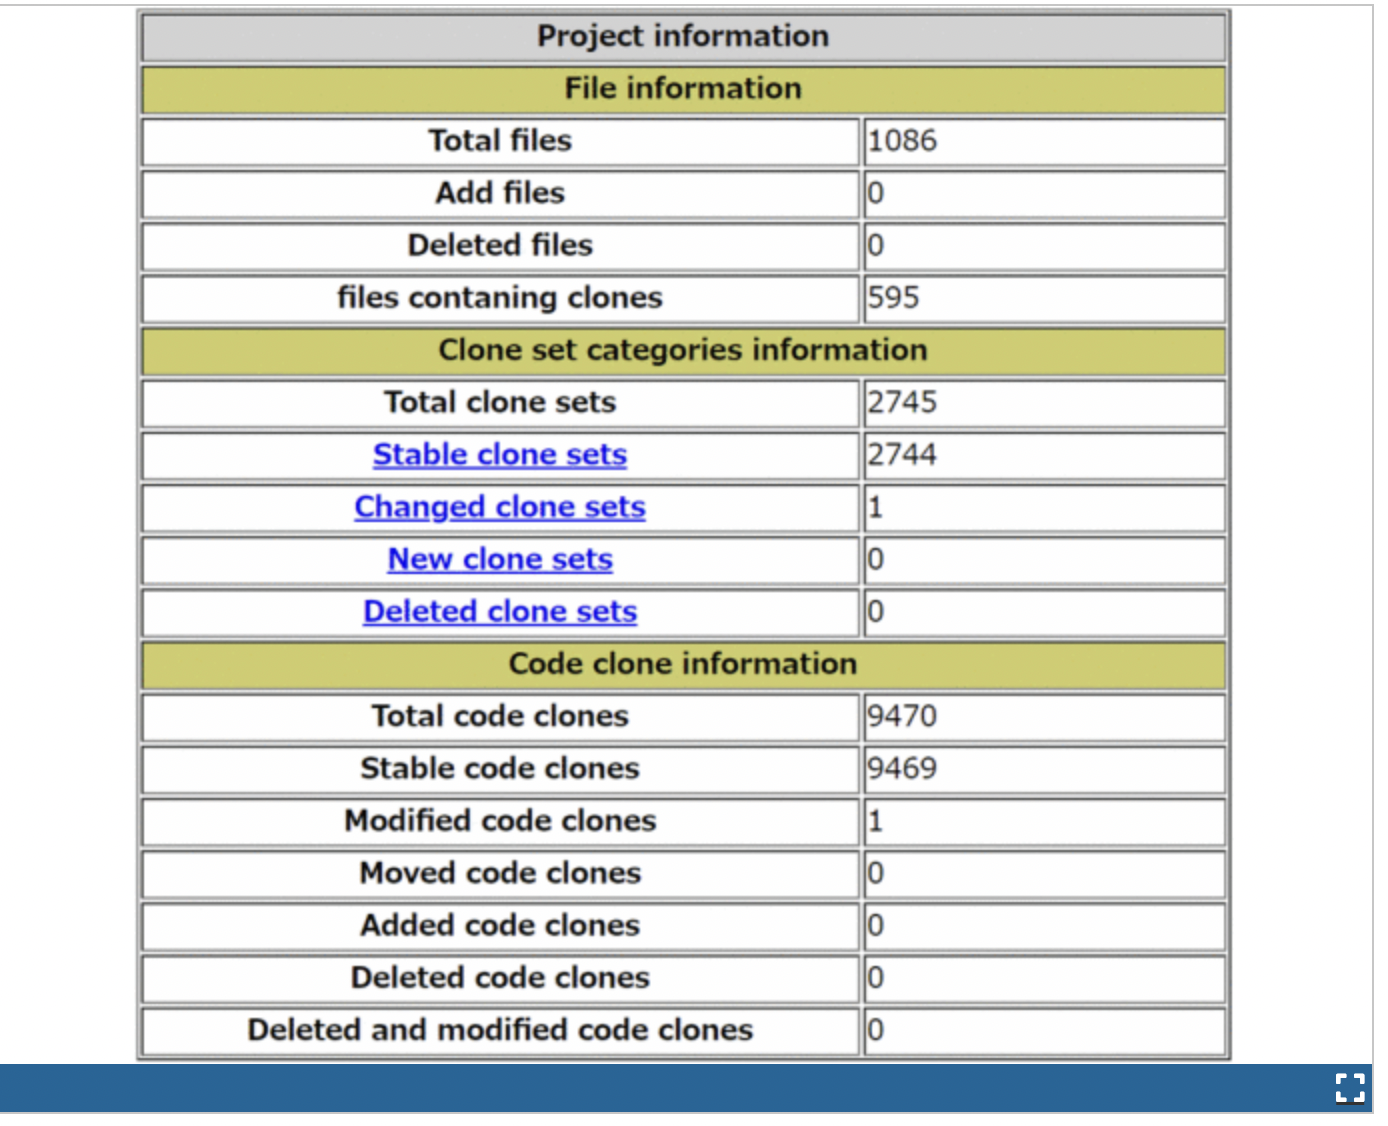

## Reference


https://compgenomr.github.io/book/clustering-grouping-samples-based-on-their-similarity.html#distance-metrics

https://stackoverflow.com/questions/14633376/how-do-i-correlate-my-original-data-with-clustered-data


https://datascience.stackexchange.com/questions/51970/hierarchical-clustering-with-precomputed-cosine-similarity-matrix-using-scikit-l


https://www.kaggle.com/code/dikshabhati2002/k-means-and-hierarchical-clustering

In [ ]:
https://stackoverflow.com/questions/64541777/compare-different-rows-within-a-group-in-pandas

https://stackoverflow.com/questions/20648346/computing-diffs-within-groups-of-a-dataframe

https://stackoverflow.com/questions/67469913/comparing-values-from-different-rows-in-groupby

In [ ]:
validation

live protocol


earlier project dataset


